In [1]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/elsevier/Bert-NER-V2'
%cd $path
import random
import utils_train as ut
import net
from trainer import train
from transformers import BertForMaskedLM, BertTokenizer
!pip install highlight-text
import matplotlib.pyplot as plt
from highlight_text import HighlightText
import warnings
warnings.filterwarnings('ignore')

Mounted at /content/drive
/content/drive/MyDrive/elsevier/Bert-NER-V2


In [2]:
CLASSES = {'MATERIAL': 1, 'MLIP': 2, 'PROPERTY': 3,
           'VALUE': 4, 'APPLICATION': 5, 'O': 0}
BATCH_SIZE = 1
SEED = 32
MAX_LENGTH = 512
CLASS_WEIGHTS = [0.3, 1., 1., 1., 1., 1.]
LEARNING_RATE = 0.0001
N_EPOCHS = 4
TRAIN_PCT = 0.8
DB_PATH = '/content/drive/MyDrive/elsevier/flask_dev/instance/AnnoApp.sqlite'

In [3]:
ut.seed_everything(SEED)
posts = ut.get_data(DB_PATH)
record_list = ut.form_record_list(posts)
random.shuffle(record_list)
N_train = int(TRAIN_PCT * len(record_list))
record_list_train = record_list[:N_train]
record_list_test = record_list[N_train:]
tokenizerBERT = BertTokenizer.from_pretrained('pranav-s/MaterialsBERT', model_max_length=MAX_LENGTH)
modelBERT = BertForMaskedLM.from_pretrained('pranav-s/MaterialsBERT')
model = net.NERBERTModel(modelBERT.base_model, output_size=len(CLASSES)+1)

vocab.txt:   0%|          | 0.00/226k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/717 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

Epoch 1
Mean training loss: 1.4618
Mean training accuracy: 0.7040
Mean training precision: 0.2559
Mean training recall: 0.2672
Mean training f1: 0.2458
Mean test accuracy: 0.7845
Mean test precision: 0.5736
Mean test recall: 0.2849
Mean test f1: 0.2832


Epoch 2
Mean training loss: 0.7619
Mean training accuracy: 0.8591
Mean training precision: 0.6888
Mean training recall: 0.5143
Mean training f1: 0.5251
Mean test accuracy: 0.8668
Mean test precision: 0.7167
Mean test recall: 0.4752
Mean test f1: 0.5099


Epoch 3
Mean training loss: 0.3173
Mean training accuracy: 0.9319
Mean training precision: 0.7618
Mean training recall: 0.8617
Mean training f1: 0.7836
Mean test accuracy: 0.8174
Mean test precision: 0.7690
Mean test recall: 0.4605
Mean test f1: 0.5461


Epoch 4
Mean training loss: 0.2345
Mean training accuracy: 0.9464
Mean training precision: 0.8188
Mean training recall: 0.8528
Mean training f1: 0.8195
Mean test accuracy: 0.9276
Mean test precision: 0.7795
Mean test recall: 0.7053
Mea

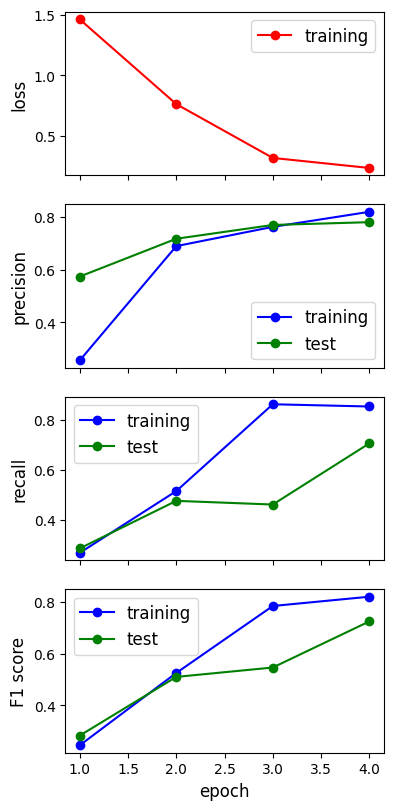

In [4]:
model, train_losses, train_accuracies, precision_test, recall_test, f1_test, test_accuracies, pred_classes, true_classes, pred_all, true_all, rec_list = train(model, tokenizerBERT,
   record_list_train, record_list_test, CLASSES, BATCH_SIZE, SEED, MAX_LENGTH, CLASS_WEIGHTS, LEARNING_RATE, N_EPOCHS, plot=True, save_model=True)

# Show prediction

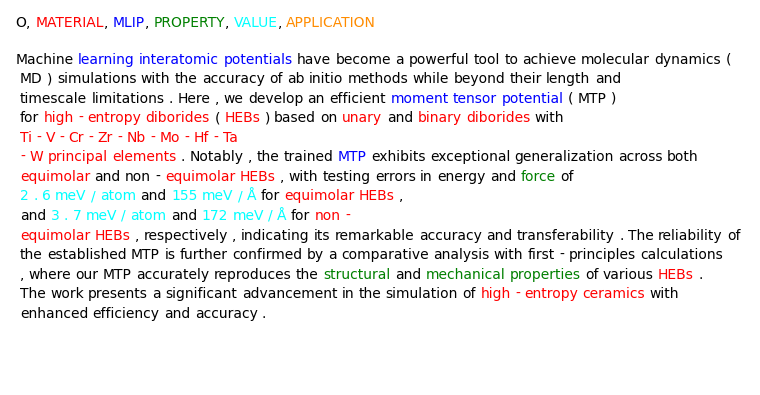

In [5]:
sample_id = 0
word_list = rec_list[sample_id]['words']
labels = true_all
predictions = pred_all[sample_id, :, :].max(dim=0)[1]
colors = ['black', 'red', 'blue', 'green', 'cyan', 'darkorange']
real_preds = predictions[:len(word_list)]
word_list_marked = ['<' + w + '>' for w in word_list]
markers = [{"color": colors[i]} for i in real_preds]
j = 0
for i in range(len(word_list)):
    if (i + 1) % 15 == 0:
        word_list_marked.insert(i + j, '\n')
        j += 1
fig, ax = plt.subplots()
ax.set_axis_off()
HighlightText(x=0., y=1, s='<O>, <MATERIAL>, <MLIP>, <PROPERTY>, <VALUE>, <APPLICATION>',
              highlight_textprops=[{"color": c} for c in colors], ax=ax)
HighlightText(x=0., y=0.9, s=' '.join(word_list_marked),
              highlight_textprops=markers, ax=ax)
plt.show()